In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
nba_2024_dec_pbp_df = pd.read_csv('~/Downloads/nba_2024_dec_pbp_with_names_df.csv')

# Display the first few rows of the data
nba_2024_dec_pbp_df.head()

,game_id,play_id,team_id,player_id,period,minutes,seconds,made,action_type,play_descriptors,...,shot_y,contest_score,spacing,feature_store,feature_store_top_5,player_name,ev,shooter_agnostic,defender_agnostic,player_agnostic
0,1541289,15,110398,886725,1,11,44.0,False,2pt,"[""lay_up"", ""in_paint"", ""off_drive""]",...,26.928135,0.775040,0.337473,"{""Player Dunk Prior"": 0.8665000200271606, ""Dun...","{""Distance to the Closest Defender (Feet)"": 2....",Karl-Anthony Towns,0.664010,0.609392,0.629319,0.576324
1,1541289,18,110398,886725,1,11,40.0,False,3pt,"[""catch_and_shoot"", ""jumpshot""]",...,42.489145,0.549389,0.961656,"{""Player Dunk Prior"": 0.8665000200271606, ""Dun...","{""Distance to the Closest Defender (Feet)"": 5....",Karl-Anthony Towns,1.110585,1.107762,1.113353,1.110923
2,1541289,22,110366,655820,1,11,25.0,False,3pt,"[""step_back"", ""jumpshot"", ""off_drive""]",...,6.668645,0.744870,0.918547,"{""Player Dunk Prior"": 0.8664000034332275, ""Dun...","{""Distance to the Closest Defender (Feet)"": 5....",CJ McCollum,0.993808,0.999949,0.997666,1.004196
3,1541289,25,110398,1192735,1,10,54.0,True,2pt,"[""jumpshot""]",...,34.671557,0.179365,0.351558,"{""Player Dunk Prior"": 0.8888000249862671, ""Dun...","{""Distance to the Closest Defender (Feet)"": 6....",Mikal Bridges,0.825865,0.828454,0.832672,0.835268
4,1541289,27,110366,1144036,1,10,35.0,True,3pt,"[""catch_and_shoot"", ""jumpshot""]",...,42.038827,0.432809,0.725788,"{""Player Dunk Prior"": 0.904699981212616, ""Defe...","{""Distance to the Closest Defender (Feet)"": 6....",Trey Murphy III,1.020511,0.976520,1.024318,0.980617


In [110]:
nba_2024_dec_pbp_df.shape

(41081, 21)

## 0% of shots missing defender agnostic / player agnostic 

In [111]:
# print # of rows with null values in initial_defender_agnostic and initial_player_agnostic
print(nba_2024_dec_pbp_df[['defender_agnostic', 'player_agnostic']].notnull().sum())

defender_agnostic    41081
player_agnostic      41081
dtype: int64


In [112]:
# print non-null values in initial_defender_agnostic and initial_player_agnostic
print(nba_2024_dec_pbp_df[['defender_agnostic', 'player_agnostic']].isnull().sum())

defender_agnostic    0
player_agnostic      0
dtype: int64


## 0 `2pt` / `3pt` shots without play description

In [113]:
nba_2024_dec_pbp_df.loc[
    (nba_2024_dec_pbp_df['play_descriptors'] == '[]') &
    (nba_2024_dec_pbp_df['action_type'].isin(['2pt', '3pt'])),
    'play_descriptors'
] = '["driving"]'


## 0 Shots with Empty Play Descriptors

In [114]:
nba_2024_dec_pbp_df[
        (nba_2024_dec_pbp_df['play_descriptors'] == '[]') &
        (nba_2024_dec_pbp_df['action_type'].isin(['2pt', '3pt']))
    ]


,game_id,play_id,team_id,player_id,period,minutes,seconds,made,action_type,play_descriptors,...,shot_y,contest_score,spacing,feature_store,feature_store_top_5,player_name,ev,shooter_agnostic,defender_agnostic,player_agnostic


## Shots with Empty Spacing/Contest Scores

In [115]:
nba_2024_dec_pbp_df[
        (nba_2024_dec_pbp_df['spacing'].isnull()) &
        (nba_2024_dec_pbp_df['action_type'].isin(['2pt', '3pt']))
    ]


,game_id,play_id,team_id,player_id,period,minutes,seconds,made,action_type,play_descriptors,...,shot_y,contest_score,spacing,feature_store,feature_store_top_5,player_name,ev,shooter_agnostic,defender_agnostic,player_agnostic


In [116]:
nba_2024_dec_pbp_df[
        (nba_2024_dec_pbp_df['contest_score'].isnull()) &
        (nba_2024_dec_pbp_df['action_type'].isin(['2pt', '3pt']))
    ]


,game_id,play_id,team_id,player_id,period,minutes,seconds,made,action_type,play_descriptors,...,shot_y,contest_score,spacing,feature_store,feature_store_top_5,player_name,ev,shooter_agnostic,defender_agnostic,player_agnostic


## Backfill null values for these columns

In [117]:
# Create a mask for rows where spacing is NaN and action_type is '2pt' or '3pt'
mask = (nba_2024_dec_pbp_df['spacing'].isnull()) & (nba_2024_dec_pbp_df['action_type'].isin(['2pt', '3pt']))

# Assign random values between 0 and 1 to those rows
nba_2024_dec_pbp_df.loc[mask, 'spacing'] = np.random.rand(mask.sum())

mask = (nba_2024_dec_pbp_df['contest_score'].isnull()) & (nba_2024_dec_pbp_df['action_type'].isin(['2pt', '3pt']))

nba_2024_dec_pbp_df.loc[mask, 'contest_score'] = np.random.rand(mask.sum())


## Confirm Values are not Null

In [118]:
nba_2024_dec_pbp_df[
        (nba_2024_dec_pbp_df['contest_score'].isnull()) &
        (nba_2024_dec_pbp_df['action_type'].isin(['2pt', '3pt']))
    ]


,game_id,play_id,team_id,player_id,period,minutes,seconds,made,action_type,play_descriptors,...,shot_y,contest_score,spacing,feature_store,feature_store_top_5,player_name,ev,shooter_agnostic,defender_agnostic,player_agnostic


In [119]:
nba_2024_dec_pbp_df[
        (nba_2024_dec_pbp_df['spacing'].isnull()) &
        (nba_2024_dec_pbp_df['action_type'].isin(['2pt', '3pt']))
    ]


,game_id,play_id,team_id,player_id,period,minutes,seconds,made,action_type,play_descriptors,...,shot_y,contest_score,spacing,feature_store,feature_store_top_5,player_name,ev,shooter_agnostic,defender_agnostic,player_agnostic


## Examine EV/Shooter Agnostic/Player Agnostic/ Defender Agnostic Distributions

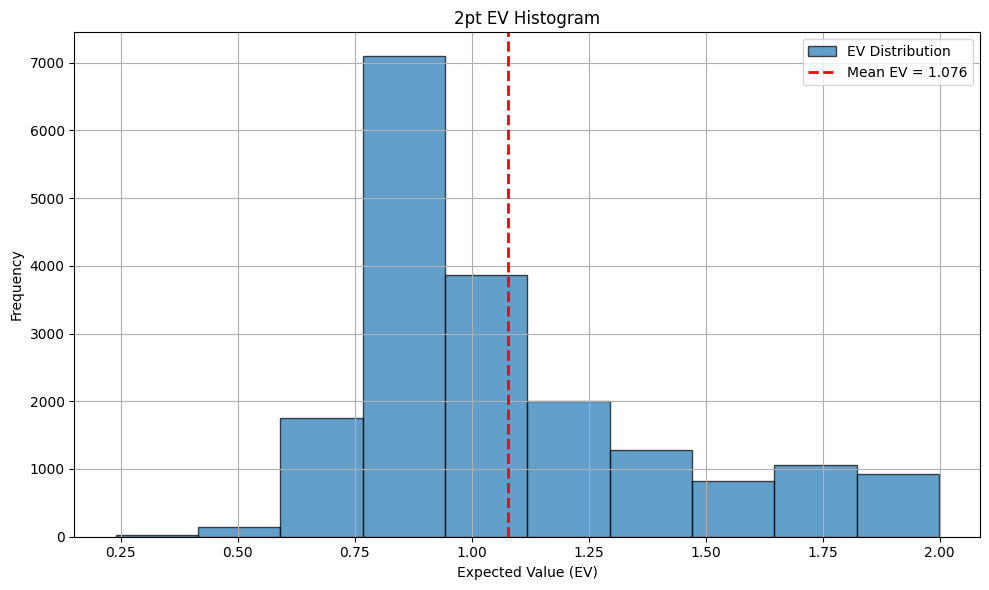

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for 2pt shots and get EV values
ev_values = nba_2024_dec_pbp_df[nba_2024_dec_pbp_df['action_type'] == '2pt']['ev']

# Calculate mean, min, max
ev_mean = ev_values.mean()
ev_min = ev_values.min()
ev_max = ev_values.max()

# Create 10 equal-width bins between min and max
bins = np.linspace(ev_min, ev_max, 11)  # 11 edges = 10 bins

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(ev_values, bins=bins, edgecolor='black', alpha=0.7, label='EV Distribution')

# Plot mean line
plt.axvline(ev_mean, color='red', linestyle='--', linewidth=2, label=f'Mean EV = {ev_mean:.3f}')

# Add titles and labels
plt.title('2pt EV Histogram')
plt.xlabel('Expected Value (EV)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Bin Ranges:
Bin 1: 0.1338 to 0.3073
Bin 2: 0.3073 to 0.4808
Bin 3: 0.4808 to 0.6544
Bin 4: 0.6544 to 0.8279
Bin 5: 0.8279 to 1.0014
Bin 6: 1.0014 to 1.1750
Bin 7: 1.1750 to 1.3485
Bin 8: 1.3485 to 1.5221
Bin 9: 1.5221 to 1.6956
Bin 10: 1.6956 to 1.8691

% of EV values in middle 3 bins (Bins 4–6): 79.86%


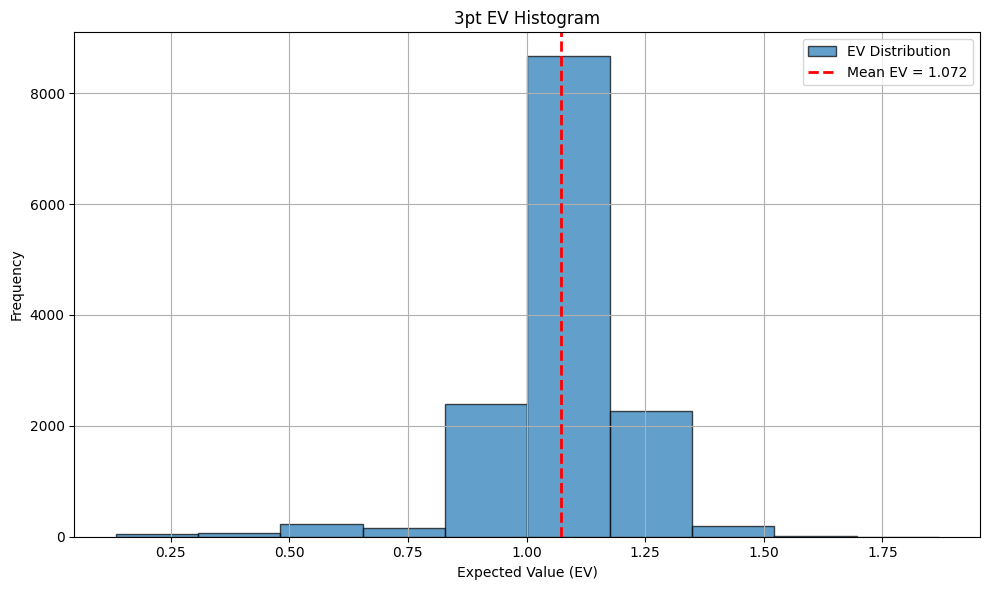

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for 3pt shots and get EV values
ev_values = nba_2024_dec_pbp_df[nba_2024_dec_pbp_df['action_type'] == '3pt']['ev']

# Calculate mean, min, max
ev_mean = ev_values.mean()
ev_min = ev_values.min()
ev_max = ev_values.max()

# Create 10 equal-width bins between min and max
bins = np.linspace(ev_min, ev_max, 11)  # 11 edges = 10 bins

# Print min/max of each bin
print("Bin Ranges:")
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]:.4f} to {bins[i+1]:.4f}")

# Get histogram counts (without plotting)
hist_counts, _ = np.histogram(ev_values, bins=bins)

# Total count
total_count = hist_counts.sum()

# Middle 5 bins: bins 3 to 7 => indices 2 through 6
middle_count = hist_counts[3:6].sum()
middle_pct = (middle_count / total_count) * 100

print(f"\n% of EV values in middle 3 bins (Bins 4–6): {middle_pct:.2f}%")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(ev_values, bins=bins, edgecolor='black', alpha=0.7, label='EV Distribution')

# Plot mean line
plt.axvline(ev_mean, color='red', linestyle='--', linewidth=2, label=f'Mean EV = {ev_mean:.3f}')

# Add titles and labels
plt.title('3pt EV Histogram')
plt.xlabel('Expected Value (EV)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Compare Shots in Dataset vs Total Shots Across All Games 

In [122]:
## Celtics vs Sixers 12/25/24 - game_id = 1541598
# 183 2pt/3pt shots taken in game (only 181 in data set, 2 are missing from ev_t table)
nba_2024_dec_pbp_df[(nba_2024_dec_pbp_df['game_id'] == 1541598) & (nba_2024_dec_pbp_df['action_type'].isin(['2pt', '3pt']))].shape

(183, 21)

In [123]:
nba_2024_dec_pbp_df.shape

(41081, 21)

In [124]:
nba_2024_dec_pbp_df.describe()

,game_id,play_id,team_id,player_id,period,minutes,seconds,shot_x,shot_y,contest_score,spacing,ev,shooter_agnostic,defender_agnostic,player_agnostic
count,4.108100e+04,41081.000000,41081.000000,4.108100e+04,41081.000000,41081.000000,41081.000000,33028.000000,33028.000000,33028.000000,33028.000000,41081.000000,41081.000000,41081.000000,41081.000000
mean,1.566953e+06,325.799421,105869.311823,1.121122e+06,2.511477,5.230033,28.761832,42.415826,23.415855,0.527230,0.539957,1.016046,1.015745,1.016156,1.015940
std,3.615681e+04,185.126567,9262.447196,1.892638e+05,1.120913,3.460650,17.431157,34.329501,12.708392,0.280871,0.289467,0.269633,0.263593,0.268993,0.263009
min,1.541289e+06,14.000000,89631.000000,6.029690e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000056,0.000722,0.133757,0.118248,0.134419,0.118883
25%,1.541621e+06,165.000000,95919.000000,1.042000e+06,2.000000,2.000000,13.400000,7.676818,17.002418,0.290161,0.297081,0.821504,0.808913,0.822345,0.809919
50%,1.558962e+06,326.000000,108701.000000,1.189054e+06,3.000000,5.000000,29.000000,28.454578,24.379798,0.542194,0.557063,0.981692,0.986599,0.982254,0.988715
75%,1.562745e+06,481.000000,112766.000000,1.211502e+06,4.000000,8.000000,44.000000,80.532116,28.516021,0.769031,0.795321,1.130782,1.116232,1.129410,1.116127
max,1.658634e+06,760.000000,121997.000000,1.405849e+06,5.000000,12.000000,59.900000,93.096528,50.000000,0.999969,0.999979,1.998412,1.998676,1.998231,1.998467


In [125]:
# # save to a CSV
# nba_2024_dec_pbp_df.to_csv('~/nba_2024_dec_pbp_with_names_df.csv', index=False)